## Exploring Ebay Car  Sales Data
In this project, we will clean and analyze a Kaggle dataset of used cars from eBay Kleinanzeigen. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
autos = pd.read_csv("autos.csv",encoding="Latin-1")
%matplotlib inline

## Initial Data Cleaning and Exploring

In [2]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [3]:
autos.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


We'll make a few changes to the column names:

- Change the columns from camelcase to snakecase.
- Change a few wordings to more accurately describe the columns.

In [6]:
# Convert the column names from camelcase to snakecase
# Reword some of the column names based on the data dictionary to be more descriptive
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_of_pictures', 'postal_code',
       'last_seen']

In [7]:
autos.describe(include="all")

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 20:37:19,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


We notice that:

- "offertime"and "seller" have mostly one value, containing very little uselful information for further analysis
- "Price" and "odometer" are numeric values stored as text
- "num_of_pictures" is filled in with 0 most of time



In [8]:
autos['price'] = autos["price"].str.replace(",","").str.replace("$","").astype(float)
autos['odometer'] = autos["odometer"].str.replace(",","").str.replace("km","").astype(float)


In [13]:
autos = autos.rename(columns={'odometer':'odometer_km'})


Let's check our updated column names.

In [14]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

## Exploring the Distributions of Odometer and Price

In [17]:
# Get unique number of odometer
print(autos.odometer_km.unique().shape)

# Distribution of odometer
print(autos.odometer_km.describe())
autos.odometer_km.value_counts()

(13,)
count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64


150000.0    32424
125000.0     5170
100000.0     2169
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1027
5000.0        967
40000.0       819
30000.0       789
20000.0       784
10000.0       264
Name: odometer_km, dtype: int64

We can see that the values in this field are rounded, which might indicate that sellers had to choose from pre-set options for this field. Additionally, there are more high mileage than low mileage vehicles.

In [15]:
# Get number of unique prices.
print(autos.price.unique().shape)

# Distribution of prices.
print(autos.price.describe())
print(autos.price.value_counts().sort_index(ascending=False).head(5))
print(autos.price.value_counts().sort_index(ascending=False).tail(5))


(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
Name: price, dtype: int64
5.0       2
3.0       1
2.0       3
1.0     156
0.0    1421
Name: price, dtype: int64



Again, the prices in this column seem rounded and contian 2357 unique values.

There are 1,421 cars listed with $0 price - given that this is only 2 percent of the of the cars, we might consider removing these rows. The maximum price is one hundred million dollars, which seems unreasonable.

We'll filter out the observations with unreasonably high prices and zero prices.

In [18]:
autos = autos[autos["price"].between(1,351000)]

Let's visually explore the relationship between odometer and price with their respective distributions on the side.

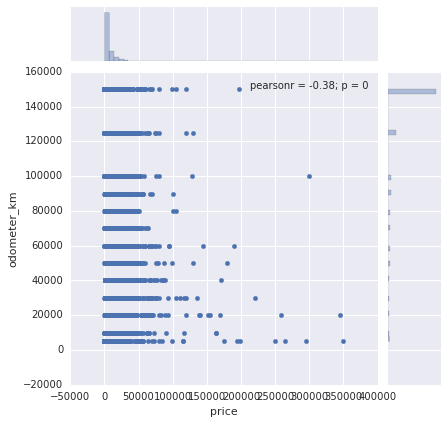

In [22]:
sns.jointplot("price","odometer_km",data=autos)

## Analyzing date variables
### Date crawled

In [29]:
autos['date_crawled'].str[:10].value_counts(normalize=True,dropna=True).sort_index()

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

### Ads created date

In [27]:
autos['ad_created'].str[:10].value_counts(normalize=True,dropna=False).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
2015-12-30    0.000021
2016-01-03    0.000021
2016-01-07    0.000021
2016-01-10    0.000041
2016-01-13    0.000021
2016-01-14    0.000021
2016-01-16    0.000021
2016-01-22    0.000021
2016-01-27    0.000062
2016-01-29    0.000021
2016-02-01    0.000021
2016-02-02    0.000041
2016-02-05    0.000041
2016-02-07    0.000021
2016-02-08    0.000021
2016-02-09    0.000021
2016-02-11    0.000021
2016-02-12    0.000041
2016-02-14    0.000041
2016-02-16    0.000021
2016-02-17    0.000021
2016-02-18    0.000041
2016-02-19    0.000062
2016-02-20    0.000041
2016-02-21    0.000062
                ...   
2016-03-09    0.033151
2016-03-10    0.031895
2016-03-11    0.032904
2016-03-12    0.036755
2016-03-13    0.017008
2016-03-14    0.035190
2016-03-15    0.034016
2016-03-16    0.030125
2016-03-17    0.031278
2016-03-18    0.013590
2016-03-19    0.033687
2016-03-20    0.037949
2016-03-21 

### Date last seen

In [28]:
autos['last_seen'].str[:10].value_counts(normalize=True,dropna=False)

2016-04-06    0.221806
2016-04-07    0.131947
2016-04-05    0.124761
2016-03-17    0.028086
2016-04-03    0.025203
2016-04-02    0.024915
2016-03-30    0.024771
2016-04-04    0.024483
2016-03-31    0.023783
2016-03-12    0.023783
2016-04-01    0.022794
2016-03-29    0.022341
2016-03-22    0.021373
2016-03-28    0.020859
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-23    0.018532
2016-03-26    0.016802
2016-03-16    0.016452
2016-03-15    0.015876
2016-03-19    0.015834
2016-03-27    0.015649
2016-03-14    0.012602
2016-03-11    0.012375
2016-03-10    0.010666
2016-03-09    0.009595
2016-03-13    0.008895
2016-03-08    0.007413
2016-03-18    0.007351
2016-03-07    0.005395
2016-03-06    0.004324
2016-03-05    0.001071
Name: last_seen, dtype: float64

Date_crawled ranges from 2016-03-05 to 2016_04_07.
Ad_created ranges from 2015-06-11 to 2016_04_07.
Last_seen ranges from 2016-03-05 to 2016_04_07.

### Registration year

In [17]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [18]:
autos["registration_year"].value_counts().sort_index()

1000       1
1001       1
1111       1
1800       2
1910       5
1927       1
1929       1
1931       1
1934       2
1937       4
1938       1
1939       1
1941       2
1943       1
1948       1
1950       3
1951       2
1952       1
1953       1
1954       2
1955       2
1956       4
1957       2
1958       4
1959       6
1960      23
1961       6
1962       4
1963       8
1964      12
        ... 
2000    3156
2001    2636
2002    2486
2003    2699
2004    2703
2005    2936
2006    2670
2007    2277
2008    2215
2009    2085
2010    1589
2011    1623
2012    1310
2013     803
2014     663
2015     392
2016    1220
2017    1392
2018     470
2019       2
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       1
9999       3
Name: registration_year, Length: 95, dtype: int64

Since the latest "crawled_date" is in 2016, we should remove all the observations with registration_year later or equal to 2017. The observations whose registration year earlier than 1886 should also be flagged, since the first automobile was invented in 1886.

In [19]:
autos = autos[autos["registration_year"].between(1900,2016)]

Let's check the updated distribution of *registration year*.

In [20]:
autos["registration_year"].value_counts().sort_index()
autos["registration_year"].value_counts(normalize=True)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
2008    0.047450
2009    0.044665
1997    0.041794
2011    0.034768
2010    0.034040
1996    0.029412
2012    0.028063
1995    0.026285
2016    0.026135
2013    0.017202
2014    0.014203
1994    0.013474
1993    0.009104
2015    0.008397
1992    0.007926
1990    0.007433
1991    0.007262
1989    0.003727
1988    0.002892
1985    0.002035
          ...   
1966    0.000471
1976    0.000450
1969    0.000407
1975    0.000386
1965    0.000364
1964    0.000257
1963    0.000171
1959    0.000129
1961    0.000129
1910    0.000107
1956    0.000086
1958    0.000086
1937    0.000086
1962    0.000086
1950    0.000064
1954    0.000043
1941    0.000043
1951    0.000043
1934    0.000043
1957    0.000043
1955    0.000043
1953    0.000021
1943    0.000021
1929    0.000021
1939    0.000021
1938    0.000021
1948    0.000021
1927    0.0000

# Exploring Price and Mileage by Brand

In [33]:
selected_brands = autos["brand"].value_counts(normalize=True).index[:10]
brand_mean_price ={}

for brand in selected_brands:
    mean_price = autos.loc[autos["brand"]==brand,"price"].mean()
    brand_mean_price[brand] = round(mean_price,2)

brand_mean_mile ={}
for brand in selected_brands:
    mean_mile = autos.loc[autos["brand"]==brand,"odometer_km"].mean()
    brand_mean_mile[brand] = round(mean_mile,2)


In [34]:
bmp = pd.Series(brand_mean_price)
bmm = pd.Series(brand_mean_mile)
df = pd.DataFrame(bmp,columns=['mean_price'])
df["mean_mileage"] = bmm
df

,mean_price,mean_mileage
audi,9212.93,129492.56
bmw,8261.38,132682.97
fiat,2793.87,117567.35
ford,3728.41,124349.50
mercedes_benz,8536.03,130796.43
opel,2944.61,129383.17
peugeot,3065.61,127356.64
renault,2431.20,128062.37
seat,4315.74,121641.30
volkswagen,5332.48,128896.58


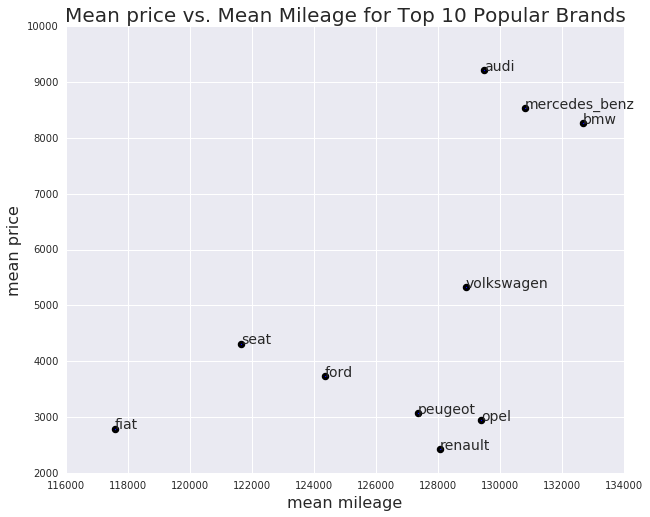

In [35]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df["mean_mileage"], df["mean_price"], lw= 3)

for txt in df.index:
    ax.annotate(txt, (df.loc[txt, "mean_mileage"], df.loc[txt, "mean_price"]))

ax.set_title("Mean price vs. Mean Mileage for Top 10 Popular Brands",size=20)
ax.set_xlabel("mean mileage", size=16)
ax.set_ylabel("mean price", size=16)


There is a slight trend to the more expensive vehicles having higher mileage, with the less expensive vehicles having lower mileage.

# Does registratoin month have any impact on pricing? 

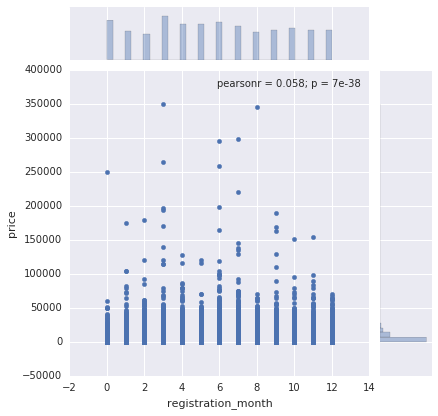

In [44]:
autos_month = autos[autos["registration_month"] > 0]
sns.jointplot(data=autos,x="registration_month", y ="price")



# How much cheaper are cars with unrepaired damages? 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


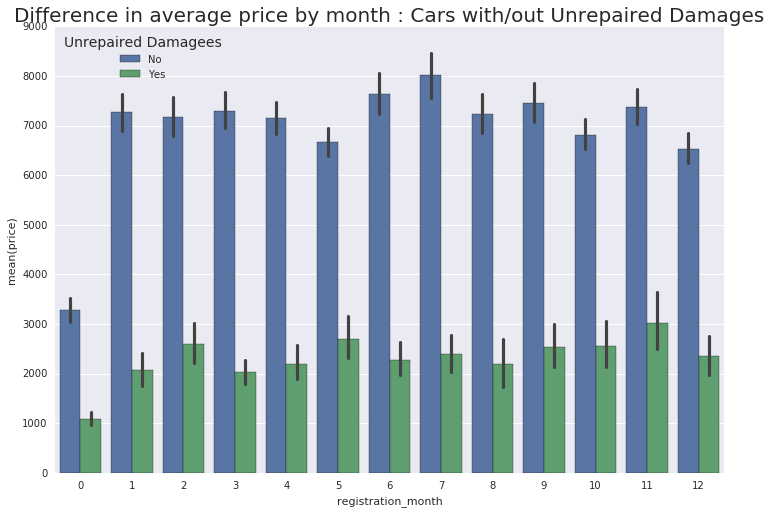

In [40]:
di = {"nein": "No", "ja": "Yes"}
autos = autos.replace({"unrepaired_damage":di})
plt.figure(figsize = (12,8))
g = sns.barplot(x="registration_month", y="price", 
            hue="unrepaired_damage", data=autos)
plt.legend(loc='upper left',title="Unrepaired Damagees")
plt.title("Difference in average price by month : Cars with/out Unrepaired Damages", size=20)